<a href="https://colab.research.google.com/github/Kashika18/Uplift-Projects/blob/main/Uplift_3_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
df= pd.read_csv('50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['State'] = df[['State']].apply(LabelEncoder().fit_transform)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [ ]:
X= df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


# Spitting the data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33, 4) (17, 4) (33,) (17,)


# Initialising linear regression

In [ ]:
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
weights=linear_reg.coef_
intercept = linear_reg.intercept_

In [ ]:
print(weights)

[ 0.80210159  0.05706069  0.0307273  21.34190169]


In [ ]:
intercept

39243.52749703583

# Predicting through graph

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#y_train= pd.Series(y_train)

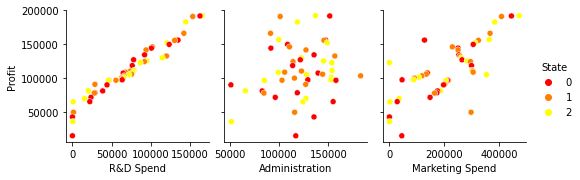

In [ ]:
sns.pairplot(df, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars=['Profit'], hue='State' , palette='autumn')

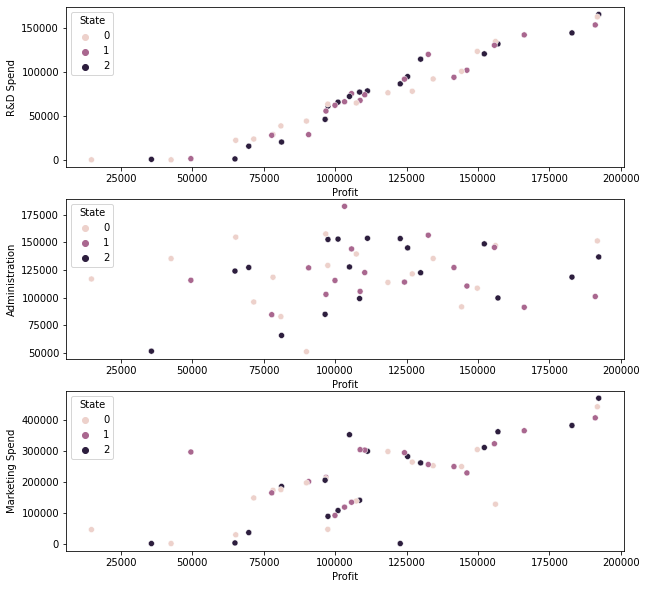

In [ ]:
fig, axarr = plt.subplots(3, figsize=(10,10))
sns.scatterplot(y='R&D Spend', x='Profit', data=df ,hue='State', ax=axarr[0])
sns.scatterplot(y='Administration', x='Profit', data=df, ax=axarr[1] , hue = 'State')
sns.scatterplot(y='Marketing Spend', x='Profit', data= df, ax=axarr[2], hue='State')

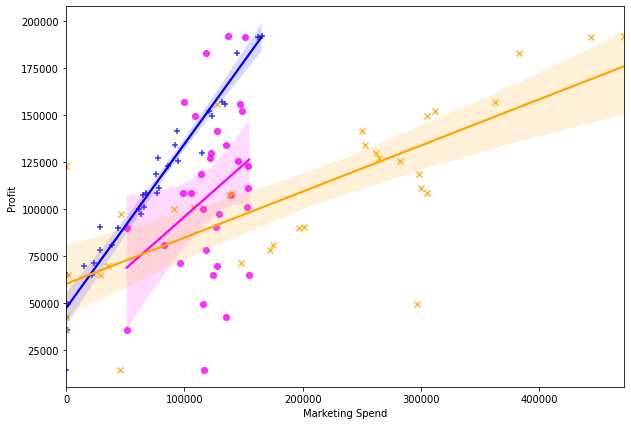

In [ ]:
# regression plot using seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=X_train['R&D Spend'], y=y_train, color='blue', marker='+')
sns.regplot(x=X_train['Administration'], y=y_train , color='magenta', marker='o')
sns.regplot(x=X_train['Marketing Spend'], y=y_train , color='orange', marker='x')

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Predicting 

In [ ]:
y_pred = linear_reg.predict(X_test)

In [ ]:
score = linear_reg.score(X_test,y_test)
score

-6.785087470595581

# Problem 2

Create a DataFrame in python and make Date column as index:
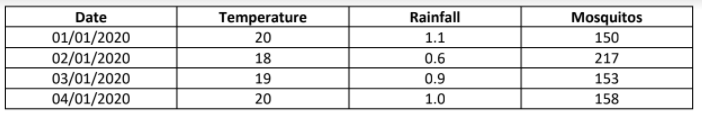

In [ ]:
data ={'Temperature':[20,18,19,20],
                    'Rainfall':[1.1, 0.6, 0.9, 1.0],
                    'Mosquitoes':[150 ,217, 153 ,158]}

df = pd.DataFrame(data, index =['01/01/2020', '02/01/2020', '03/01/2020' ,'04/01/2020'])

In [ ]:
df.head()

,Temperature,Rainfall,Mosquitoes
01/01/2020,20,1.1,150
02/01/2020,18,0.6,217
03/01/2020,19,0.9,153
04/01/2020,20,1.0,158


Code to return the Temperature and Rainfall of rows 2 and 3

In [ ]:
df.iloc[1:3,0:2]

,Temperature,Rainfall
02/01/2020,18,0.6
03/01/2020,19,0.9


Code to return max temperature from Temperature column.

In [ ]:
df['Temperature'].max()

20

Code to return min rainfall from Rainfall column.

In [ ]:
df['Rainfall'].min()

0.6

Average from Mosquitos column.

In [ ]:
df['Mosquitoes'].mean()

169.5